<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/MLP_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/breastcancerdata.csv")


In [3]:
print(df.shape)

(569, 33)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

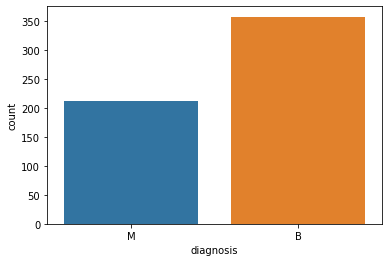

In [6]:
sns.countplot(df['diagnosis'], label = "Count")

In [7]:
train, test = train_test_split(df, test_size=0.35, random_state = 38)
print("Training Data :", train.shape)
print("Testing Data :", test.shape)

Training Data : (369, 32)
Testing Data : (200, 32)


In [8]:
train_id = train['id']
test_id = test['id']

train_df = train.iloc[:,1:]
test_df = test.iloc[:,1:]

print("Training Data :", train_df.shape)
print("Testing Data :", test_df.shape)

Training Data : (369, 31)
Testing Data : (200, 31)


In [9]:
train_df_x = train_df.iloc[:,1:]
train_df_x = MinMaxScaler().fit_transform(train_df_x)

test_df_x = test_df.iloc[:,1:]
test_df_x = MinMaxScaler().fit_transform(test_df_x)

print(train_df_x.shape)
print(test_df_x.shape)

(369, 30)
(200, 30)


In [10]:
train_df_y = train_df.iloc[:,:1]
train_df_y[train_df_y=='M'] = 0
train_df_y[train_df_y=='B'] = 1
train_df_y = train_df_y.astype('float32')


test_df_y = test_df.iloc[:,:1]
test_df_y[test_df_y=='M'] = 0
test_df_y[test_df_y=='B'] = 1
test_df_y = test_df_y.astype('float32')

print(train_df_y.shape)
print(test_df_y.shape)

(369, 1)
(200, 1)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(30,), bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='relu', bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='random_normal')
])

In [12]:
from keras.metrics import Precision, Recall

# compile the model with binary cross-entropy loss and Adam optimizer, and add precision, recall, and F1 score to the metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)


# train the model using the training set
history = model.fit(train_df_x, train_df_y, epochs=100, batch_size=32, validation_data=(test_df_x, test_df_y))

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_df_x, test_df_y, verbose=0)

# Print the results
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)


Epoch 1/100
12/12 [==============================] - 4s 74ms/step - loss: 0.7157 - accuracy: 0.5068 - precision: 0.6984 - recall: 0.3793 - val_loss: 0.7059 - val_accuracy: 0.6300 - val_precision: 0.6364 - val_recall: 0.9520
Epoch 2/100
12/12 [==============================] - 0s 18ms/step - loss: 0.7045 - accuracy: 0.6531 - precision: 0.6940 - recall: 0.8017 - val_loss: 0.6930 - val_accuracy: 0.6300 - val_precision: 0.6294 - val_recall: 0.9920
Epoch 3/100
12/12 [==============================] - 0s 35ms/step - loss: 0.6871 - accuracy: 0.7263 - precision: 0.7191 - recall: 0.9267 - val_loss: 0.6799 - val_accuracy: 0.6300 - val_precision: 0.6294 - val_recall: 0.9920
Epoch 4/100
12/12 [==============================] - 0s 29ms/step - loss: 0.6745 - accuracy: 0.7317 - precision: 0.7098 - recall: 0.9698 - val_loss: 0.6699 - val_accuracy: 0.6350 - val_precision: 0.6313 - val_recall: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.6856 - pr

7/7 [==============================] - 0s 3ms/step
Confusion Matrix: 
[[ 70   5]
 [  4 121]]


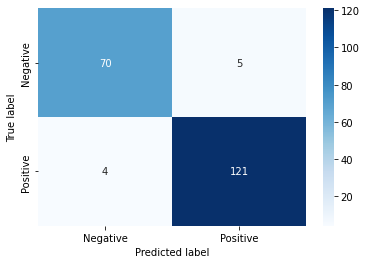

In [13]:
from sklearn.metrics import confusion_matrix

# predict classes for the test set
y_pred_prob = model.predict(test_df_x)
y_pred = (y_pred_prob > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(test_df_y, y_pred, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()
